<a href="https://colab.research.google.com/github/Marielena-GS/aprendizaje-automatico-252601/blob/main/4_3_Gonz%C3%A1lez_Marielena_M%C3%A9todos_de_clustering_basados_en_particiones_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.3: Taller de Métodos de clustering basados en  particiones Parte 2**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [45]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


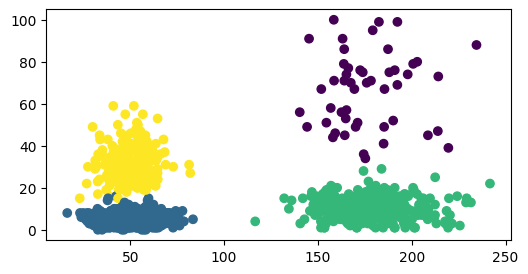

In [46]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-means que tiene un único parámetro: el número de clústeres (K).**

In [47]:
# PASO 1 elejir los centros iniciales de forma randomica
def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

def paso1_elije_centros(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])
  # 1.1 Completa el codigo aqui
  x1 = random_sample_float(K, np.min(Dx[:,0]), np.max(Dx[:,0]))
  x2 = random_sample_float(K, np.min(Dx[:,1]), np.max(Dx[:,1]))
  cDx[:,0] = x1
  cDx[:,1] = x2
  return cDx

Los centros iniciales elegidos aleatoriamente son:
[[ 93.72055701  68.37263133]
 [195.53651693  33.49132801]
 [207.24571397  69.49707782]
 [126.96086612  74.85048274]]


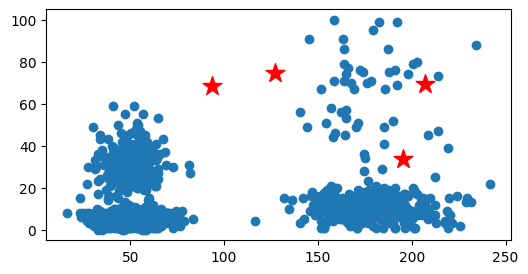

In [48]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_centros(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [49]:
# Definimos la distancia euclidiana de una instancia x con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
  return np.linalg.norm(C - x, axis=1);

def paso2_asigna_puntos(Dx, cDx):
  Dyp = np.zeros(Dx.shape[0])
  # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
  for i in np.arange(Dx.shape[0]):
      # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
      # a cada centro existente en cDx. Podemos utilizar para ello la función
      # distancia_euclidiana_grupo.

      distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i],cDx ) # 1.2 Completa el codigo aqui

      # Una vez calculada la distancia, necesitamos averiguar el índice de
      # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
      pred_y = np.argmin(distancia_punto_a_centros)
      Dyp[i] = pred_y
  return Dyp

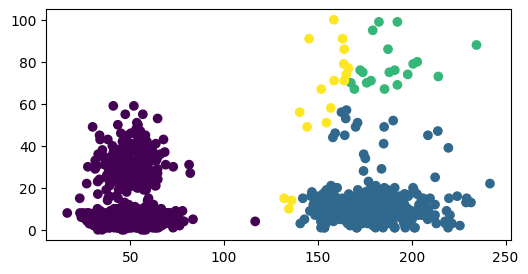

In [50]:
Dyp = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)

2.   Paso de actualización del centroide
En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$


In [51]:
def paso3_actualiza_centros(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  for k in range(K):
      # Seleccionamos los puntos asignados al cluster k
      puntos_cluster_k = Dx[Dyp == k]
      # Calculamos la media de las coordenadas x e y
      if len(puntos_cluster_k) > 0:  # Evitar división por cero si el cluster está vacío
          cDx[k,:] = np.mean(puntos_cluster_k, axis=0) # 1.3 Completa el codigo aqui
      else:
          # Si el cluster está vacío, mantenemos el centroide anterior
          cDx[k,:] = cDx_ant[k,:]
  return cDx

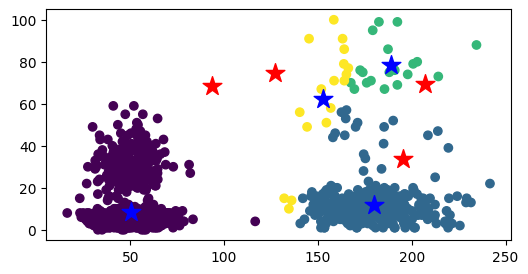

In [52]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [53]:
def MyKMeans(Dx, K):
  cDx = paso1_elije_centros(K, Dx) # 1.4 Completa el codigo aqui
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx) # 1.5 Completa el codigo aqui
    # Calcular los nuevos centros
    #cDx = # 1.6 Completa el codigo aqui
    cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

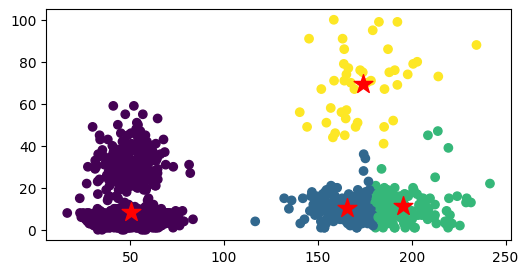

In [54]:
cDx, Dyp,cDxIni = MyKMeans(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 1: MODIFICA KMEANS PARA QUE SE CONVIERTA EN KMEANS++**

In [55]:
def distancia_euclidiana(a, b):
  return np.sqrt(np.sum((a - b) ** 2, axis=1))

def paso1_elije_centros_inteligente(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])

  # Paso 1: Primer centroide aleatorio,se elige aleatoriamente
  #        un punto de datos como primer centroide.
  n_samples, n_features = Dx.shape
  first_idx = np.random.randint(n_samples)
  cDx[0] = Dx[first_idx]

  # Pasos 2-4: Elegir centroides restantes
  for k in range(1, K):
      # Calcular distancias al centroide más cercano
      distances = np.zeros(n_samples)
      for i in range(n_samples):
          # Distancias del punto i a todos los centroides existentes
          point = Dx[i]
          dist_to_centroids = distancia_euclidiana(
              cDx[:k],
              np.tile(point, (k, 1))
          )
          # Guardar la distancia mínima
          distances[i] = np.min(dist_to_centroids)
      # Convertir distancias a probabilidades
      probabilities = distances ** 2
      probabilities /= probabilities.sum()

      # Elegir siguiente centroide basado en probabilidades
      next_idx = np.random.choice(n_samples, p=probabilities)
      cDx[k] = Dx[next_idx]
  return cDx

In [56]:
def MyKMeansPlusPlus(Dx, K):
  cDx = paso1_elije_centros_inteligente(K, Dx)
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

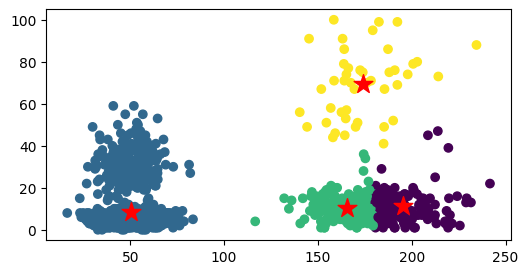

In [57]:
cDx, Dyp,cDxIni = MyKMeansPlusPlus(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 2: USA EL METODO DEL CODO CON KMEANS++ PARA DETERMINAR EL MEJOR K**
<hr>
<h2>Elegir el mejor valor de K</h2>

Para elegir el mejor valor de K se suele usar la técnica del codo. Ésta consiste en probar diferentes valores de K y evaluar el agrupamientos según alguna medida de evaluación intrínseca (ya que se supone que no se conoce la verdad básica). En este ejemplo, se usan dos medidas diferentes: la medida de Silueta y la R cuadrado.


In [58]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [59]:
def medida_R_cuadrado(X, Xyp, cXs):
    # Calcular SST (Suma Total de Cuadrados)
    centro_global = np.mean(X, axis=0)
    SST = np.sum(np.sum((X - centro_global)**2, axis=1))
    # Calcular SSE (Suma de Cuadrados del Error)
    SSE = 0
    for i in range(len(X)):
        # Encontrar el centroide correspondiente para cada punto
        cluster_label = int(Xyp[i])
        centroide = cXs[cluster_label]
        SSE += np.sum((X[i] - centroide)**2)

    # Calcular R²
    if SST == 0:
        return 1.0
    R_cuadrado = 1 - (SSE / SST)
    return R_cuadrado

Text(0, 0.5, 'Medida de R cuadrado')

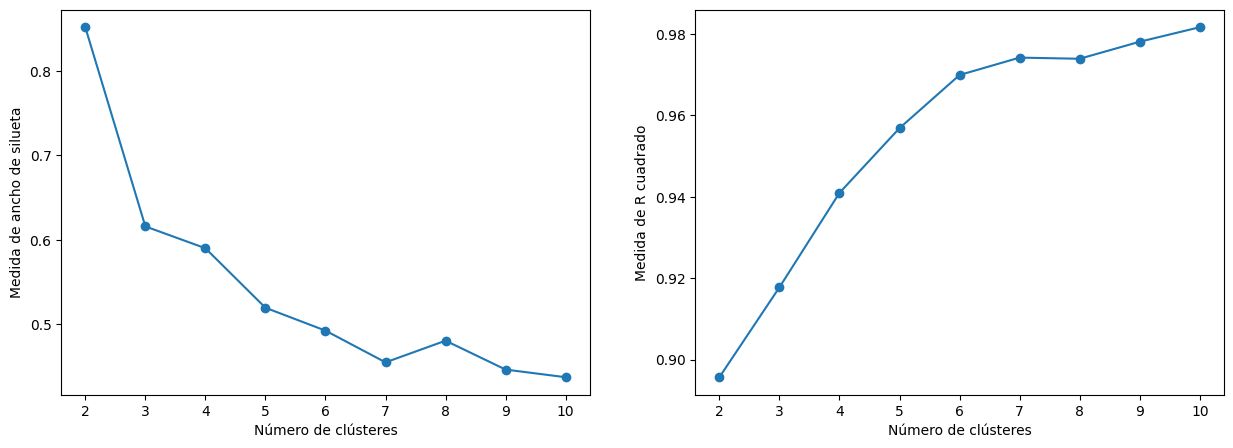

In [60]:
#METODO DEL CODO
# voy a probar para valores de k desde 2 al 11
rsilueta = np.zeros(9)
rrsquare = np.zeros(9)
for k in np.arange(2,11):
    cDx, Dyp,cDxIni = MyKMeansPlusPlus(Dx, k)
    rsilueta[k-2] = silhouette_score(Dx, Dyp)
    rrsquare[k-2] = medida_R_cuadrado(Dx, Dyp, cDx)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de R cuadrado")

Redacte una conclusión que analice los gráficos del método del codo y del coeficiente de silueta (y/o R²) para la selección del número de clusters (k). Indique cuál es el valor óptimo de k y fundamente su elección con base en la interpretación de dichos gráficos.

1.  **Análisis del Coeficiente de Silueta:**
    El gráfico del coeficiente de silueta muestra un pico claro en `K = 2`, donde el valor alcanza aproximadamente `0.85`. Un coeficiente de silueta alto indica que los objetos están bien agrupados dentro de sus propios clusters y bien separados de otros clusters. En este caso, el valor para `K = 2` es significativamente más alto que para cualquier otro valor de K, lo que sugiere que dos clusters forman una estructura de agrupamiento muy coherente y bien definida para estos datos.

2.  **Análisis de la R-cuadrado (Método del Codo):**
    El gráfico de la medida de R-cuadrado muestra una tendencia creciente a medida que aumenta el número de clústeres. Esto es esperable, ya que más clústeres siempre tenderán a explicar una mayor proporción de la varianza total de los datos. Sin embargo, en el método del codo, buscamos el punto donde la mejora marginal en la explicación de la varianza comienza a disminuir drásticamente, formando una 'rodilla' o 'codo'. Aunque no hay un codo extremadamente pronunciado, se observa que a partir de `K = 6` (con un valor de R² de aproximadamente `0.97`), las ganancias en R² son menores o incluso se observa una disminución para `K = 7` (que podría indicar una mala inicialización o una estructura de datos inconsistente para ese número de clústeres en una ejecución particular). Las mejoras posteriores son marginales.

**Valor óptimo de K:**
Considerando ambos gráficos, el valor óptimo de `K` es **2**.

**Fundamentación:**
- La elección de `K = 2` se fundamenta principalmente en el **coeficiente de silueta**. Este métrica proporciona una medida directa de la cohesión y separación de los clústeres, y el valor máximo observado para `K = 2` indica la estructura de agrupamiento más robusta. Aunque la R-cuadrado sigue aumentando, el punto de máxima silueta en `K = 2` sugiere que añadir más clústeres más allá de este punto no mejora significativamente la calidad del agrupamiento, o incluso puede llevar a clústeres menos coherentes o peor separados, como se insinúa por la disminución de la silueta a medida que K aumenta más allá de 2. El R-cuadrado no contradice esta elección de forma definitiva, ya que el objetivo del método del codo no es maximizar R-cuadrado per se, sino encontrar el punto de inflexión.

## Métricas disponibles en KMeans de scikit-learn
El objeto KMeans de scikit-learn proporciona varias métricas y atributos importantes para evaluar el clustering:


Text(0, 0.5, 'Medida de incercia')

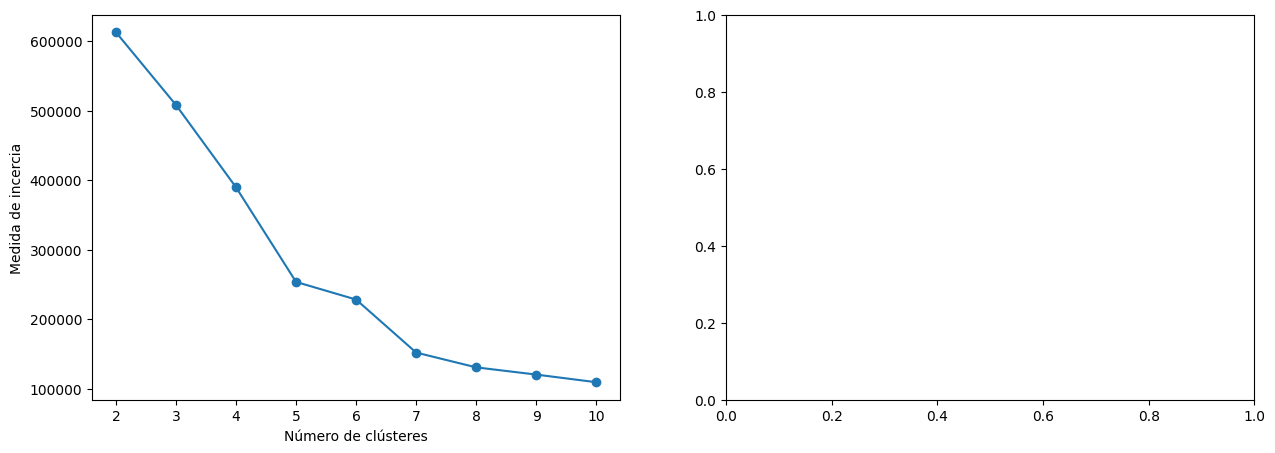

In [62]:
from sklearn.cluster import KMeans

rincercia = np.zeros(9)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Dx)
    rincercia[k-2] =  kmeans.inertia_

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de incercia")

Text(0, 0.5, 'Índice de Calinski-Harabasz')

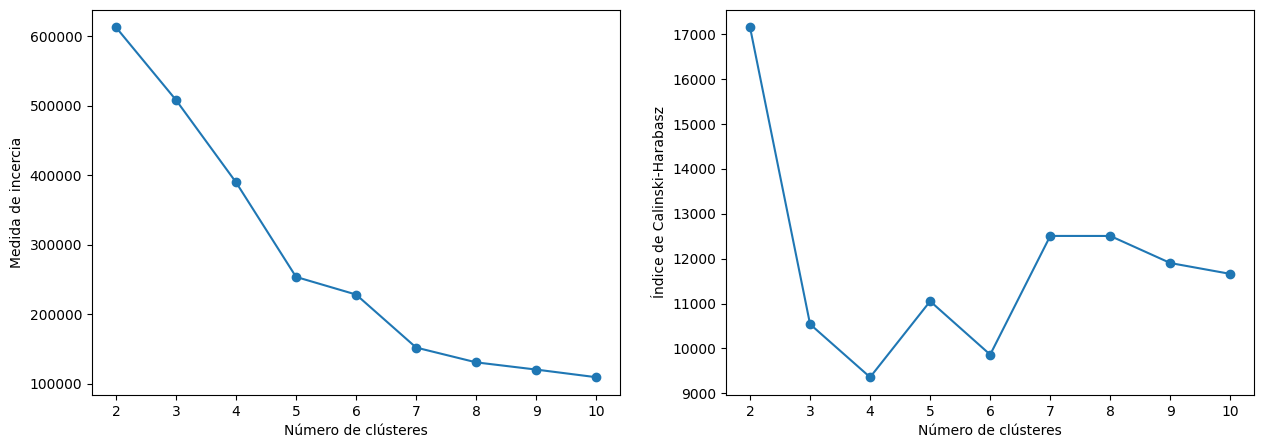

In [63]:
# 2.3 Complete el codigo anterior para graficar el indice de calinski
rcalinski = np.zeros(9)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(Dx)
    rcalinski[k-2] =  calinski_harabasz_score(Dx, kmeans.labels_)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de incercia")

ax[1].plot( np.arange(2,11),rcalinski, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Índice de Calinski-Harabasz")

Redacte una conclusión comparativa basada en el gráfico de inercia (método del codo) y el índice de Calinski-Harabasz. Determine el número óptimo de clusters (k) e interprete cómo cada métrica justifica dicha selección.

1.  **Análisis de la Inercia (Método del Codo):**
    El gráfico de inercia muestra una disminución constante a medida que aumenta el número de clústeres. Buscamos un punto de inflexión o 'codo' donde la mejora marginal en la reducción de la inercia comienza a disminuir drásticamente. Observamos una reducción significativa de la inercia hasta aproximadamente `k=5` o `k=6`. Después de este punto, la tasa de disminución de la inercia se vuelve menos pronunciada, sugiriendo que añadir más clústeres no aporta una mejora sustancial en la cohesión interna de los clústeres. Por ejemplo, la caída de `k=4` a `k=5` es de ~136k, mientras que de `k=5` a `k=6` es de ~25k. Esto podría indicar un 'codo' alrededor de `k=5` o `k=6`.

2.  **Análisis del Índice de Calinski-Harabasz:**
    El Índice de Calinski-Harabasz mide la relación entre la dispersión entre clústeres y la dispersión dentro de los clústeres. Un valor más alto de este índice generalmente indica clústeres mejor definidos y más densos. Al examinar el gráfico, se observa un pico claro y significativo en `k=2` con un valor de aproximadamente `17148`. Aunque hay un segundo pico menos pronunciado alrededor de `k=7` (~12504), el valor más alto se encuentra en `k=2`.

**Determinación del número óptimo de clusters (k_optimo):**

- Basándonos en la interpretación de ambas métricas, el número óptimo de clusters es **k = 2**.

**Justificación:**

*   **Índice de Calinski-Harabasz:** Esta métrica es la más contundente en esta situación. Un valor máximo en `k=2` sugiere que en este punto, los clústeres están muy bien separados entre sí y son internamente muy compactos, lo que indica una estructura de datos natural de dos grupos.

*   **Inercia (Método del Codo):** Aunque el gráfico de inercia muestra una curva donde la

# 🎯 **EJ 3: USA EL SIGUIENTE DATASET CON KMEANS++**
Cargue el dataset dataset_cuatro_separables_peque y realice el siguiente análisis de agrupamiento (clustering):

Determinación del k óptimo: Utilice el algoritmo k-means para calcular y graficar el método del codo con un rango de k razonable (por ejemplo, de 2 a 15 clusters).

Selección: Con base en los gráficos, justifique y seleccione el número óptimo de clusters (k_optimo).

Modelo final: Ajuste un modelo final de k-means utilizando el k_optimo.

Visualización: Visualice los resultados del agrupamiento y que los puntos estén coloreados según el cluster asignado. Incluya los centroides en la visualización.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


✅ Dataset cargado desde URL GitHub


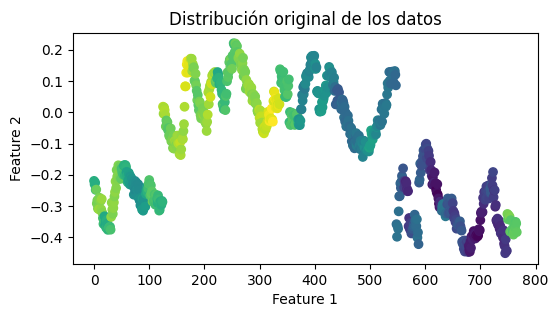

In [65]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_separables_peque.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)
ax.set_title("Distribución original de los datos")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()

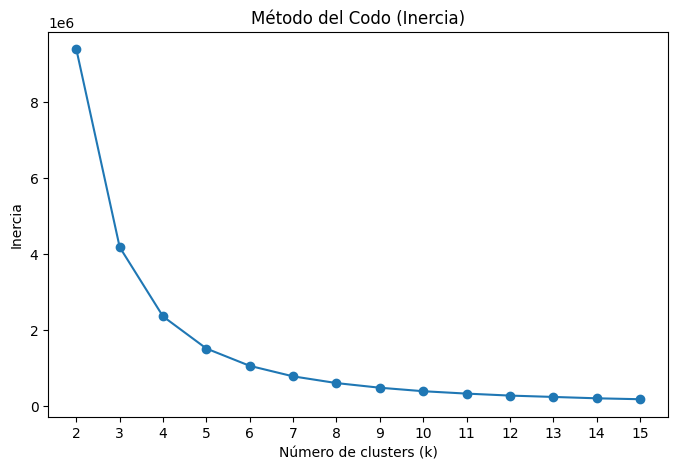

In [73]:
# 2. Determinación del k óptimo (método del codo)
inertia_values = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        random_state=42,
        n_init='auto'
    )
    kmeans.fit(Dx)
    inertia_values.append(kmeans.inertia_)

# Gráfica del método del codo
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_range, inertia_values, marker='o')
ax.set_title('Método del Codo (Inercia)')
ax.set_xlabel('Número de clusters (k)')
ax.set_ylabel('Inercia')
ax.set_xticks(list(k_range))
plt.show()

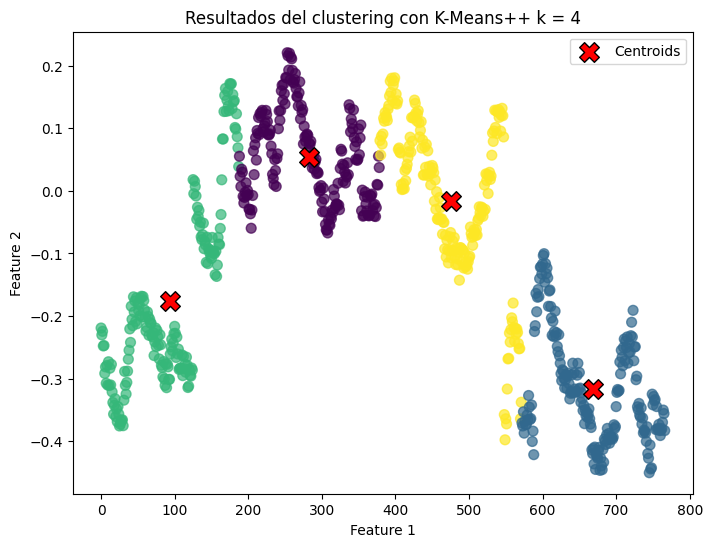

In [74]:
#Selección del número óptimo de clusters
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_optimal.fit(Dx)

# Get cluster labels and centroids
labels = kmeans_optimal.labels_
centroids = kmeans_optimal.cluster_centers_

# Visualize the clustering results
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Dx[:, 0], Dx[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', edgecolor='black', label='Centroids')
ax.set_title(f'Resultados del clustering con K-Means++ k = {optimal_k}')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

## Selección del K Óptimo

Para determinar el número óptimo de clústeres (K) para el dataset `dataset_cuatro_separables_peque.xlsx`, se ha analizado la Inercia (Método del Codo).

- Con base en la gráfica del método del codo, se observa una disminución muy pronunciada de la inercia al aumentar el número de clusters desde k = 2 hasta k = 4.

- A partir de k = 4, la reducción de la inercia se vuelve progresivamente menor, indicando que agregar más clusters no produce una mejora significativa en la compactación de los datos.

- Este punto representa el “codo” de la curva, por lo que se selecciona k = 4 como el número óptimo de clusters.

# 🚀 ¡TALLER FINALIZADO!"